# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/german_credit_data.csv")
df_encoded = pd.read_csv("data/encoded_dataset.csv")

In [3]:
df

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  Risk  
0             1169         6             radio/TV  good  
1             5951        48             radio/TV   bad  
2             2096        12            education  good  
3             7882        42  furniture/equipment  good  
4             4870        24                  car   bad  
..             ...       ...                  ...   ...  
995           1736        12  furniture/equipment  good  
996           3857        30                  car  good  
997            804        12             radio/TV  good  
998           1845        45             radio/TV   bad  
999           4576        45                  car  good  

[1000 rows x 11 columns]

In [4]:
df['Risk'] = df['Risk'].replace('bad', True)
df['Risk'] = df['Risk'].replace('good', False)

How many unique values are in the dataset?

In [5]:
df.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

In [6]:
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                  bool
dtype: object

To get a good overview of the data, we will be using a library called sweetviz to generate a report. The report is interactive, and can be found in the GitHub repository!

In [7]:
import sweetviz as sv

sv.analyze(df, target_feat = 'Risk').show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# According to the dataset, how different is the Credit Risk for Men and Women?

In [8]:
males = df.loc[df['Sex'] == 'male']
females = df.loc[df['Sex'] == 'female']

In [9]:
maleRisks = males['Risk'].value_counts()
total = males.shape[0]

print('For males, ' + str(maleRisks[1]/total) + '% have bad credit risk.')

For males, 0.2768115942028985% have bad credit risk.


In [10]:
femaleRisks = females['Risk'].value_counts()
total = females.shape[0]

print('For females, ' + str(femaleRisks[1]/total) + '% have bad credit risk.')

For females, 0.35161290322580646% have bad credit risk.


In [11]:
import plotly.graph_objs as go
import plotly.offline as py 
import plotly.tools as tls 
df_good = df.loc[df["Risk"] == False]['Sex'].values.tolist()
df_bad = df.loc[df["Risk"] == True]['Sex'].values.tolist()
df_age = df['Sex'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Sex"
)
#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05, width = 800, height = 600)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/home/jonasybei/.local/lib/python3.10/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# According to the dataset, how different is the Credit Risk for people of different ages?

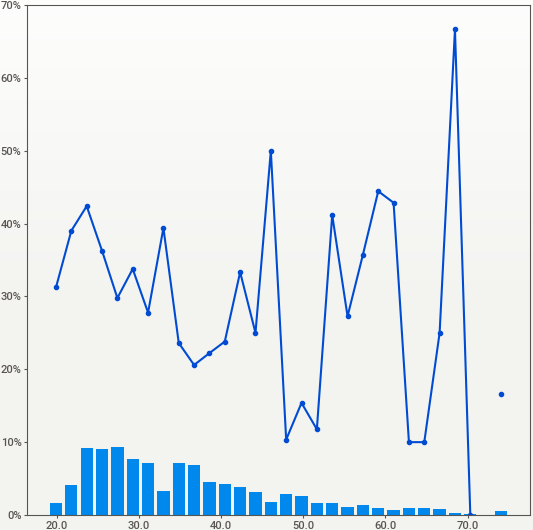

You can find this image in the sweetviz report that is attached.

In [12]:
import plotly.tools as tls 
df_good = df.loc[df["Risk"] == False]['Age'].values.tolist()
df_bad = df.loc[df["Risk"] == True]['Age'].values.tolist()
df_age = df['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05, width = 600, height = 400)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/home/jonasybei/.local/lib/python3.10/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Now let's bin the ages into different categories

In [13]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)

# And let's re-create "df_bad" dataframes with "df_good" we created.
df_good = df[df["Risk"] == False]
df_bad = df[df["Risk"] == True]

In [14]:
import plotly.tools as tls 
df_good = df.loc[df["Risk"] == False]['Age_cat'].values.tolist()
df_bad = df.loc[df["Risk"] == True]['Age_cat'].values.tolist()
df_age = df['Age_cat'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)
#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05, width = 800, height = 400)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

/home/jonasybei/.local/lib/python3.10/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# According to the dataset, how different is the Credit Risk for different housing situations?

In [15]:
owned_house = df.loc[df['Housing'] == 'own']
rent_house = df.loc[df['Housing'] == 'rent']
free_house = df.loc[df['Housing'] == 'free']

In [16]:
ownedRisks = owned_house['Risk'].value_counts()
total = owned_house.shape[0]

print('For owned houses, ' + str(ownedRisks[1]/total) + '% have bad credit risk.')

For owned houses, 0.2608695652173913% have bad credit risk.


In [17]:
rentRisk = rent_house['Risk'].value_counts()
total = rent_house.shape[0]

print('For rented houses, ' + str(rentRisk[1]/total) + '% have bad credit risk.')

For rented houses, 0.39106145251396646% have bad credit risk.


In [18]:
freeRisk = free_house['Risk'].value_counts()
total = free_house.shape[0]

print('For free houses, ' + str(freeRisk[1]/total) + '% have bad credit risk.')

For free houses, 0.4074074074074074% have bad credit risk.


In [19]:
import plotly.graph_objs as go 
import plotly.offline as py 
#First plot
trace0 = go.Bar(
    x = df[df["Risk"]== False]["Housing"].value_counts().index.values,
    y = df[df["Risk"]== False]["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df[df["Risk"]== True]["Housing"].value_counts().index.values,
    y = df[df["Risk"]== True]["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition',
    width = 600,
    height = 600
)


fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"

py.iplot(fig, filename='Housing-Grouped')

# How correlated are the variables?

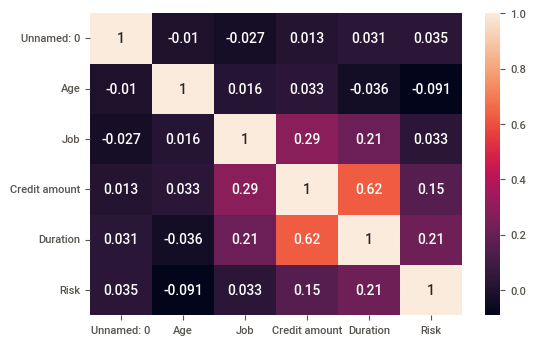

In [20]:
corr = df.corr()

_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

To make sure every column is displayed in heatmap perform label encoding

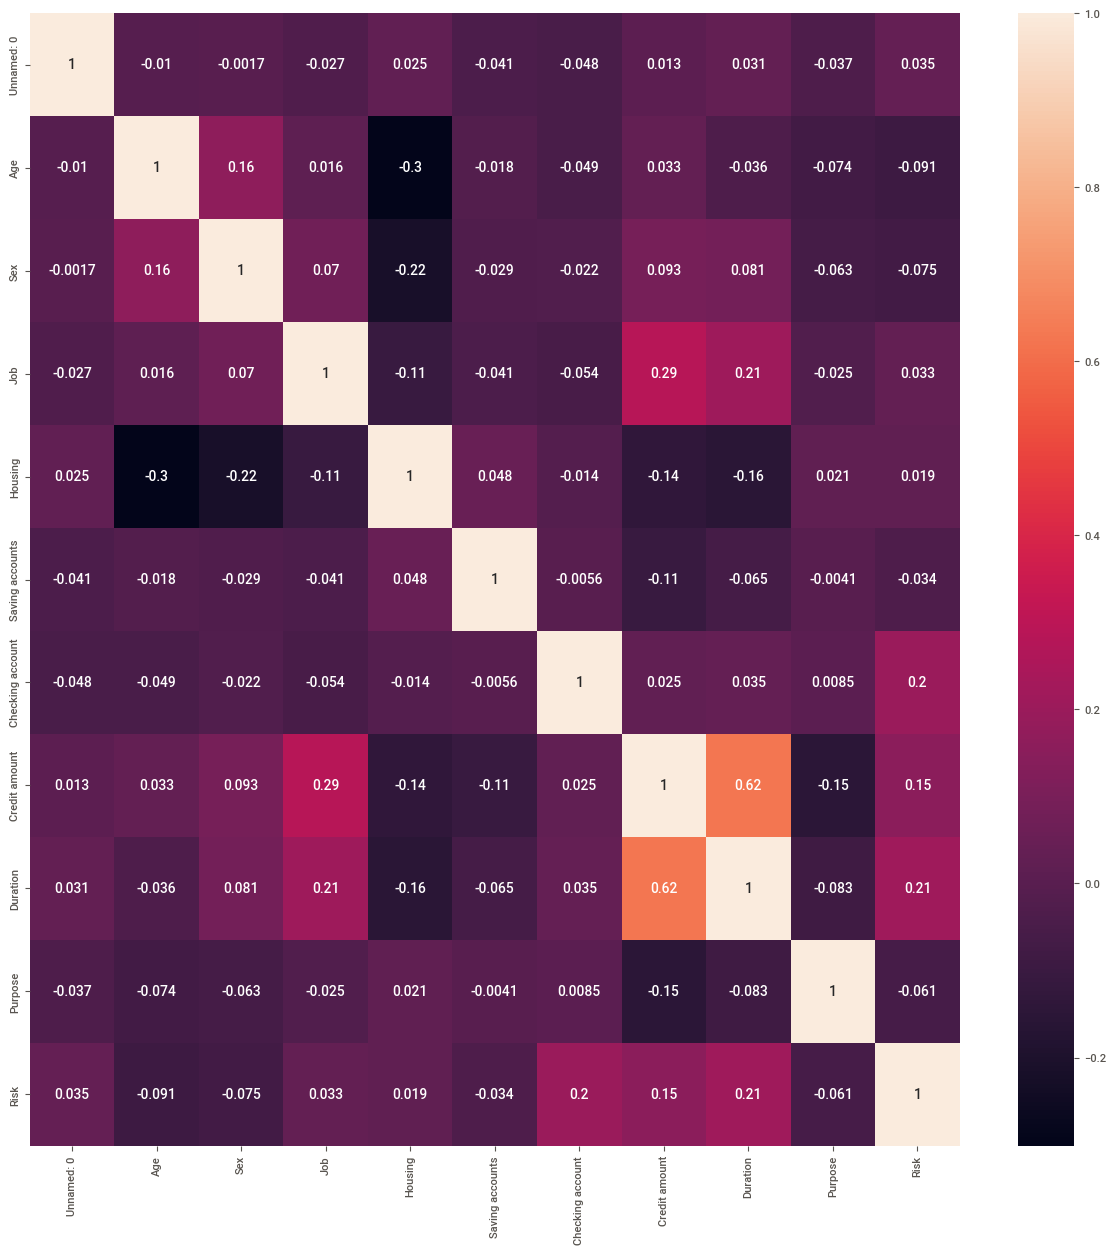

In [21]:
label_encoding = df
label_encoding['Sex']= label_encoding['Sex'].astype('category').cat.codes
label_encoding['Housing'] = label_encoding['Housing'].astype('category').cat.codes
label_encoding['Saving accounts'] = label_encoding['Saving accounts'].astype('category').cat.codes
label_encoding['Checking account'] = label_encoding['Checking account'].astype('category').cat.codes
label_encoding['Purpose'] = label_encoding['Purpose'].astype('category').cat.codes

corr = label_encoding.corr()

plt.figure(figsize=(15,15))
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

checking account, credit amount and duration have the highest correlation with risk

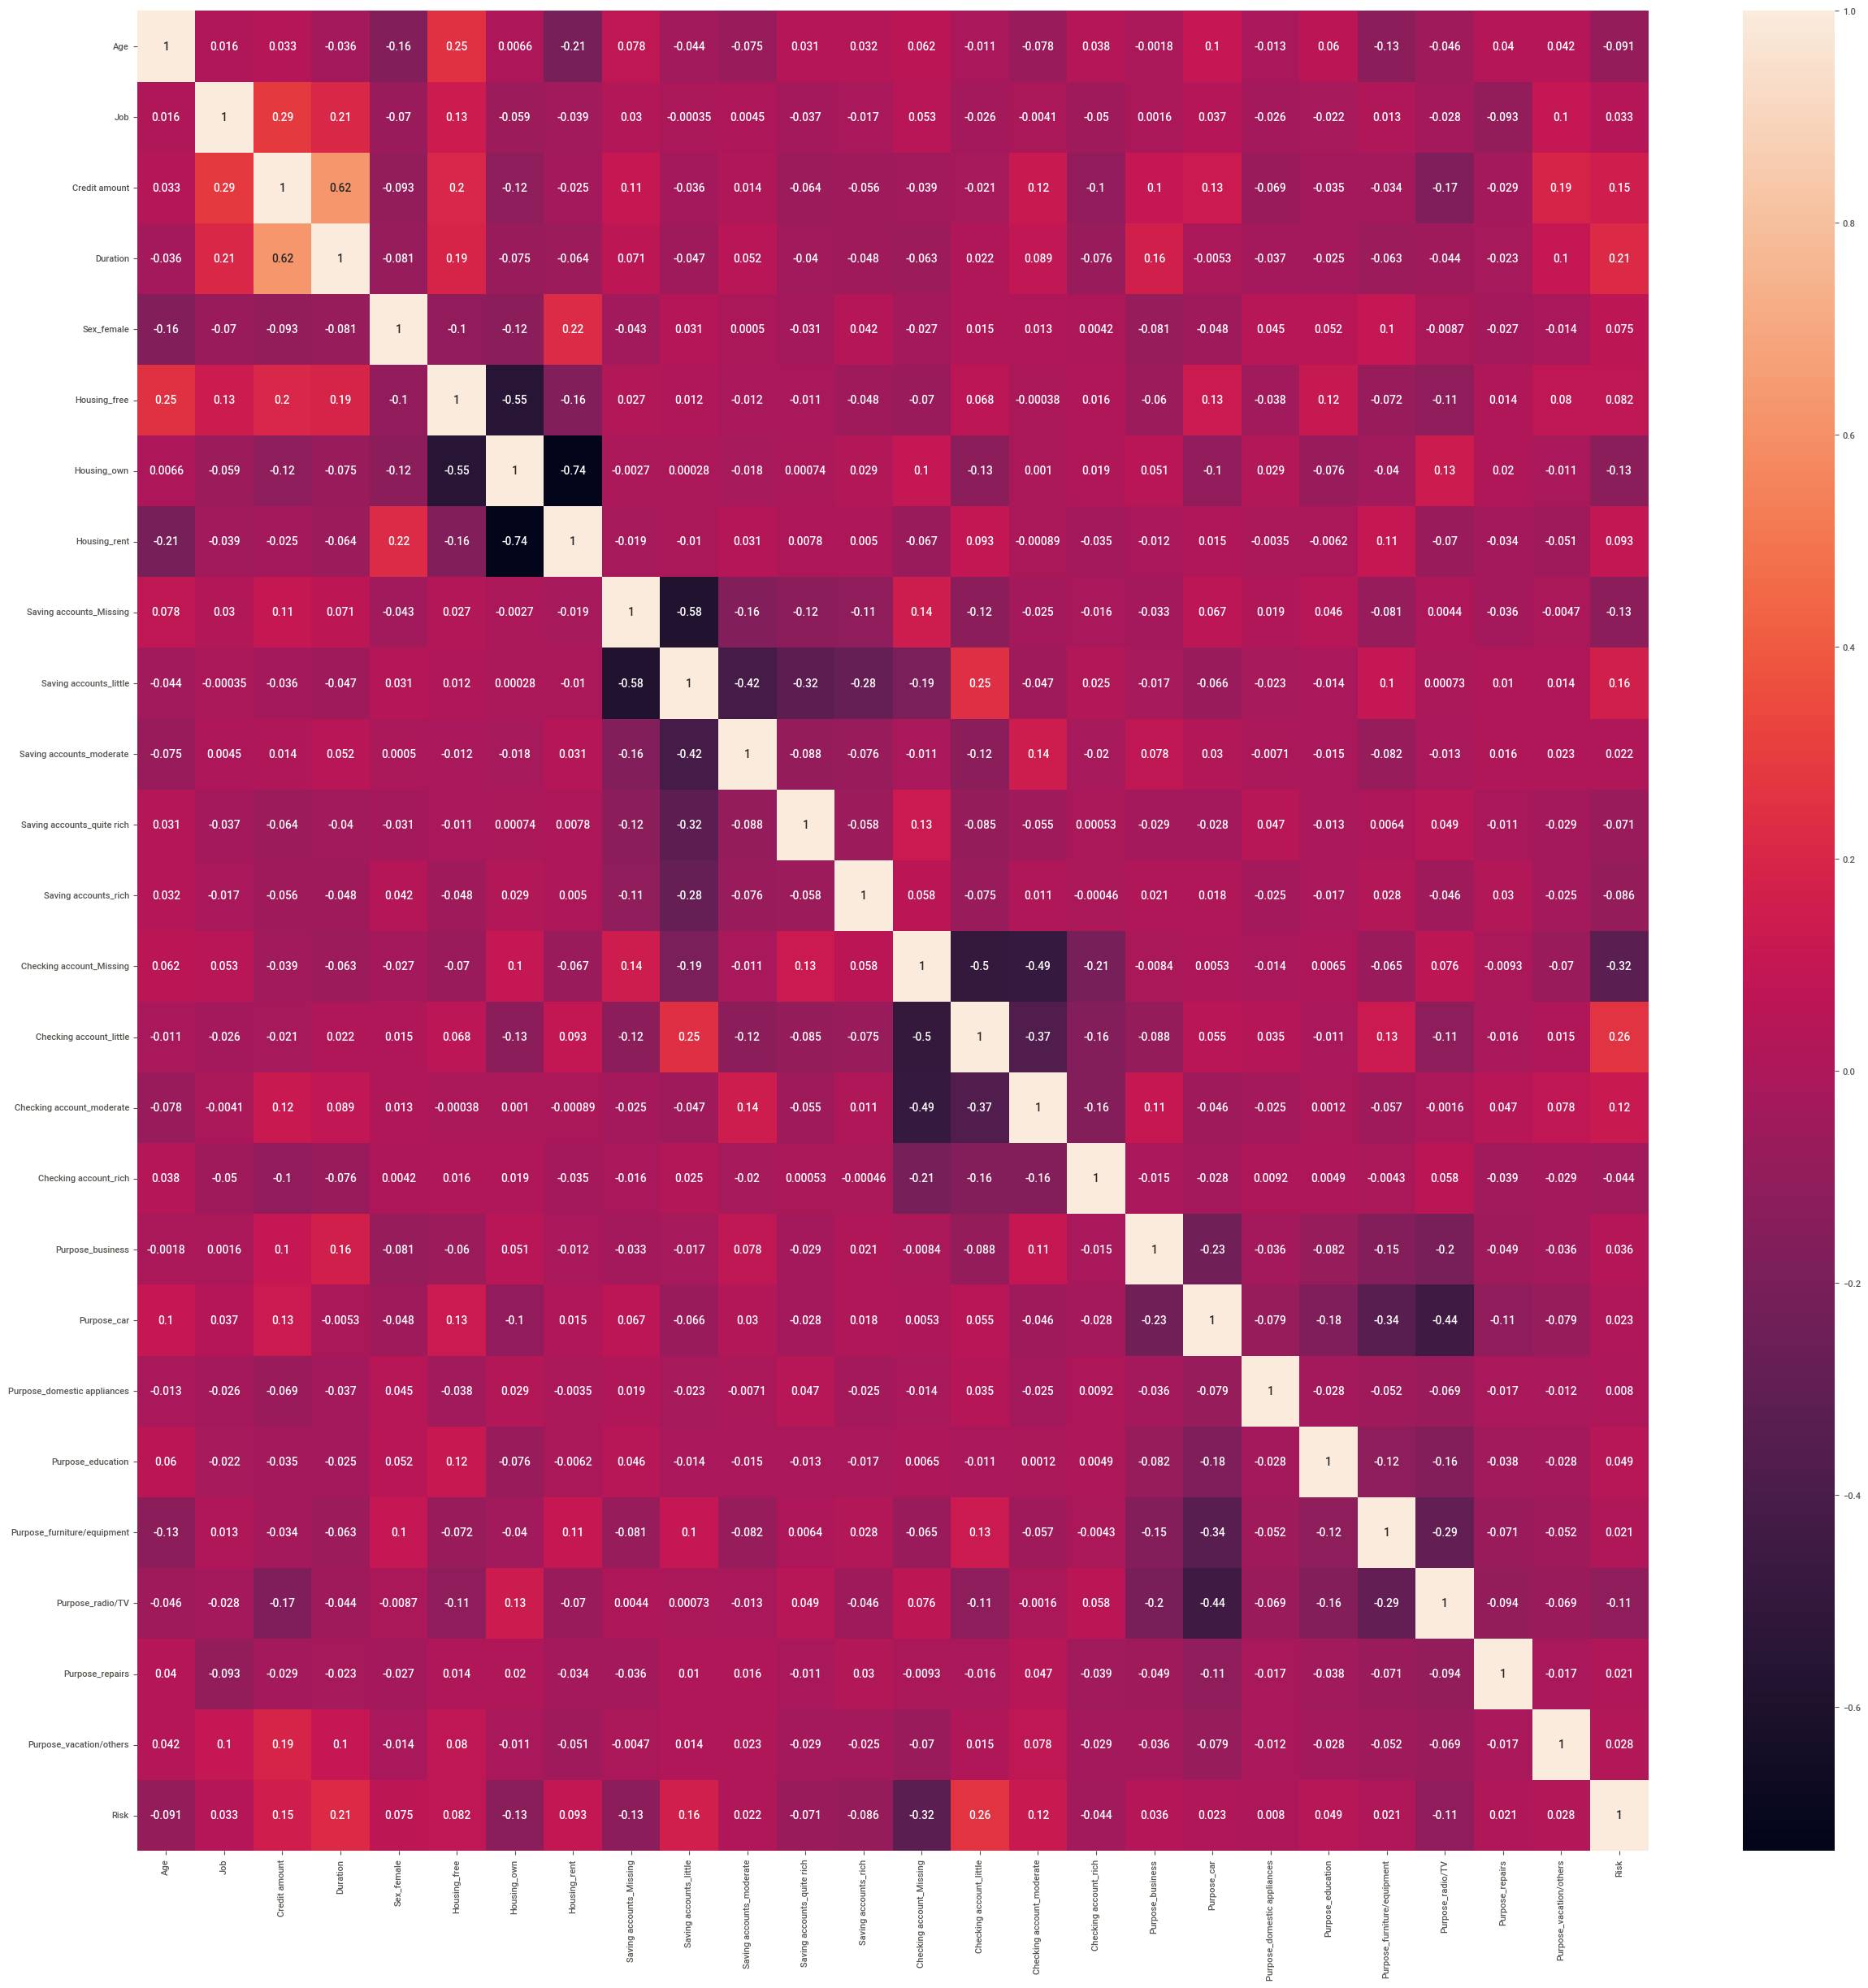

In [22]:
corr = df_encoded.corr()

plt.figure(figsize=(30,30))
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Note the big correlation between 'Duration' and 'Credit Amount'.